In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [4]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1,28,28,1)/ 255.0

train_scaled, val_scaled, train_target, val_target= train_test_split(train_scaled, train_target, test_size= 0.2, random_state= 42)

In [5]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size= 3, activation= 'relu', padding= 'same', input_shape= (28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation= 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation= 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [11]:
# Model Compile

model.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= 'accuracy'
)


In [13]:
import datetime
import tensorflow as tf

In [14]:
# 학습데이터의 log를 저장할 폴더 생성(지정)

log_dir = "logs/my_board/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# 텐서보드 콜백 정의 하기
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= log_dir, histogram_freq= 1)

In [15]:
history = model.fit(
    train_scaled, train_target,
    epochs= 20,
    validation_data= (val_scaled, val_target),
    callbacks= tensorboard_callback
)

Epoch 1/20
1500/1500 [==============================] - 8s 4ms/step - loss: 0.5356 - accuracy: 0.8077 - val_loss: 0.3442 - val_accuracy: 0.8754
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3504 - accuracy: 0.8749 - val_loss: 0.2805 - val_accuracy: 0.8944
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3025 - accuracy: 0.8915 - val_loss: 0.2589 - val_accuracy: 0.9022
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2676 - accuracy: 0.9029 - val_loss: 0.2439 - val_accuracy: 0.9092
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2442 - accuracy: 0.9123 - val_loss: 0.2344 - val_accuracy: 0.9124
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2231 - accuracy: 0.9167 - val_loss: 0.2260 - val_accuracy: 0.9162
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2034 - accuracy: 0.9248 - val_loss: 0.2204 - val_accuracy:

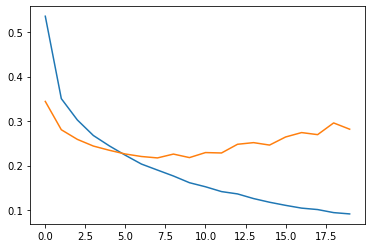

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])